In [1]:
%run src/model.py

In [4]:
from src.functions import custom_loss_function, list_files, custom_loss_extreme, custom_loss_parabola, custom_loss_tens, custom_loss_2k
from skimage import io
from matplotlib.pyplot import imshow

In this notebook, I use different loss functions and subject matter to explore the effect on the colorization of photos.  To see the formulas for the different loss functions, go to the  ```functions.py``` file.

**Training set: celebrities**
**Error: MSE**
**Test set: celebrities**

Epoch 1/10
50/50 [==============================] - 11s 218ms/step - loss: 0.0221 - accuracy: 0.5358
Epoch 2/10
50/50 [==============================] - 11s 221ms/step - loss: 0.0121 - accuracy: 0.5540
Epoch 3/10
50/50 [==============================] - 11s 218ms/step - loss: 0.0109 - accuracy: 0.5575
Epoch 4/10
50/50 [==============================] - 11s 219ms/step - loss: 0.0109 - accuracy: 0.5383
Epoch 5/10
50/50 [==============================] - 11s 217ms/step - loss: 0.0111 - accuracy: 0.5607
Epoch 6/10
50/50 [==============================] - 11s 221ms/step - loss: 0.0115 - accuracy: 0.5474
Epoch 7/10
50/50 [==============================] - 11s 218ms/step - loss: 0.0107 - accuracy: 0.5859
Epoch 8/10
50/50 [==============================] - 11s 218ms/step - loss: 0.0107 - accuracy: 0.5794
Epoch 9/10
50/50 [==============================] - 11s 220ms/step - loss: 0.0108 - accuracy: 0.5716
Epoch 10/10
50/50 [==============================] - 11s 218ms/step - loss: 0.0105 - accura

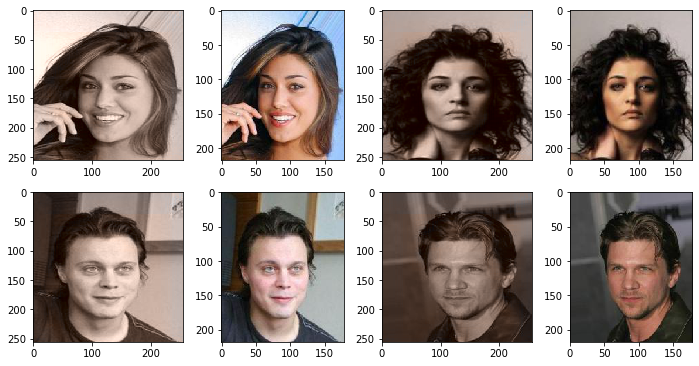

In [5]:
directory = 'celebrities/'
my_model = MyModel()
my_model.make_model('mse', directory, steps_per_epoch = 50, epochs = 10)


## Once the modile is fit, show 4 predicted images alongside their original
fig =plt.figure(figsize = (10, 10))
axes = []
files = list_files('celebrities/')
i = 8
for a in range(0,i,2):
    axes.append(fig.add_subplot(4, 4, a+1))
    img = my_model.predict_process(files[a])
    plt.imshow(img[0], cmap = 'viridis')
    axes.append(fig.add_subplot(4, 4, a+2))
    plt.imshow(io.imread(files[a]))
fig.tight_layout()    
plt.show()

This shows a sepia tone, likely due to the error as well as the unpredictability of celebrity colorization.

**Training set: celebrities (using previous model for predictions)**
    
**Error: MSE**
    
**Test set: landscapes**

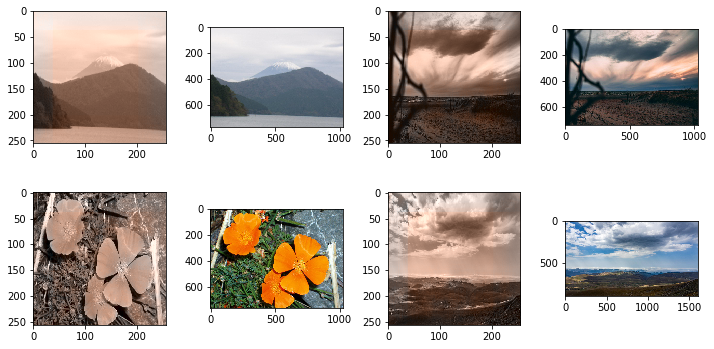

In [12]:
#Training set: celebrities (using previous model for predictions)
#Error: MSE
#Test set: landscapes

#Display images
files = list_files('landscapes/')[30:50]
i = 4
fig =plt.figure(figsize = (10, 10))
axes = []
for a in range(0,i,2):
    axes.append(fig.add_subplot(4, 4, a+1))
    img = my_model.predict_process(files[a])
    plt.imshow(img[0], cmap = 'viridis')
    axes.append(fig.add_subplot(4, 4, a+2))
    plt.imshow(io.imread(files[a]))
fig.tight_layout()    
plt.show()

When landscapes are used in the model trained on celebrities, the images become sepia toned

**Training set: landscapes**
**Error: MSE**
**Test set: landscapes**

Epoch 1/10
50/50 [==============================] - 18s 369ms/step - loss: 0.0276 - accuracy: 0.4975
Epoch 2/10
50/50 [==============================] - 19s 370ms/step - loss: 0.0188 - accuracy: 0.5046
Epoch 3/10
50/50 [==============================] - 19s 372ms/step - loss: 0.0196 - accuracy: 0.4958
Epoch 4/10
50/50 [==============================] - 19s 373ms/step - loss: 0.0184 - accuracy: 0.5113
Epoch 5/10
50/50 [==============================] - 19s 377ms/step - loss: 0.0176 - accuracy: 0.5064
Epoch 6/10
50/50 [==============================] - 19s 374ms/step - loss: 0.0178 - accuracy: 0.5283
Epoch 7/10
50/50 [==============================] - 19s 383ms/step - loss: 0.0182 - accuracy: 0.5441
Epoch 8/10
50/50 [==============================] - 19s 378ms/step - loss: 0.0171 - accuracy: 0.5474
Epoch 9/10
50/50 [==============================] - 19s 375ms/step - loss: 0.0176 - accuracy: 0.5322
Epoch 10/10
50/50 [==============================] - 19s 375ms/step - loss: 0.0171 - accura

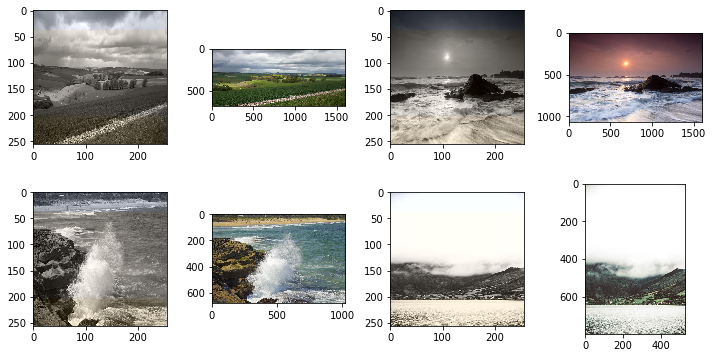

In [7]:

directory = 'landscapes/'
landscape_mse = MyModel()
landscape_mse.make_model('mse', directory, steps_per_epoch = 50, epochs = 10)

#Display images
files = list_files('landscapes/')[31:51]
i = 8
fig =plt.figure(figsize = (10, 10))
axes = []
farm = landscape_mse.predict_process(files[0])
for a in range(0,i,2):
    axes.append(fig.add_subplot(4, 4, a+1))
    img = landscape_mse.predict_process(files[a])
    plt.imshow(img[0], cmap = 'viridis')
    axes.append(fig.add_subplot(4, 4, a+2))
    plt.imshow(io.imread(files[a]))
fig.tight_layout()    
plt.show()

When the model is trained on landscapes, the colors are more of a blue-ish gray

(array([9.55900187e-06, 2.89797073e-03, 5.52330508e-02, 3.91406987e-02,
        1.96847160e-02, 3.39242149e-02, 9.08346429e-02, 6.42228369e-03,
        5.43725130e-04, 2.52630764e-05]),
 array([-26.06703405, -22.04638601, -18.02573797, -14.00508993,
         -9.98444189,  -5.96379385,  -1.94314581,   2.07750223,
          6.09815027,  10.11879831,  14.13944636]),
 <a list of 10 Patch objects>)

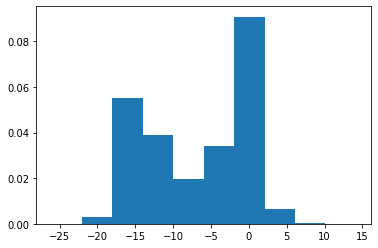

In [8]:
### Lab pixel values for the a layer for the original farm image
plt.hist(color.rgb2lab(io.imread(files[0]))[:,:,1].ravel(), density =True)

This shows that the farm (top left image) has more pure green colors (negative) than pure red colors (positive) 

(array([1.66517478e-04, 1.87090322e-02, 2.80420880e-02, 9.18644899e-03,
        3.06597841e-02, 1.26556101e-02, 2.67122961e-03, 4.34560840e-04,
        1.02089396e-04, 6.76213108e-06]),
 array([-25.60530617, -15.86195793,  -6.11860969,   3.62473855,
         13.36808679,  23.11143503,  32.85478327,  42.59813151,
         52.34147975,  62.08482799,  71.82817623]),
 <a list of 10 Patch objects>)

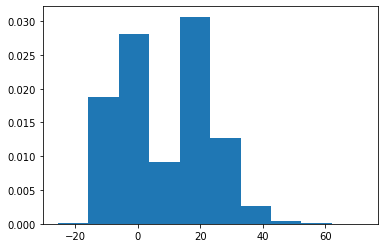

In [9]:
### Pixel values for the b layer for the original farmhouse image
plt.hist(color.rgb2lab(io.imread(files[0]))[:,:,2].ravel(), density =True)

This shows that the farm has more pure yellow colors (positive) than pure blue colors(negative) 

(array([1.48667800e-04, 4.03526885e-04, 3.82288628e-04, 8.28292028e-04,
        3.48307417e-03, 1.38498922e+00, 8.07053771e-04, 4.03526885e-04,
        1.91144314e-04, 2.33620828e-04]),
 array([-3.402526  , -2.68406832, -1.96561063, -1.24715294, -0.52869526,
         0.18976243,  0.90822011,  1.6266778 ,  2.34513549,  3.06359317,
         3.78205086]),
 <a list of 10 Patch objects>)

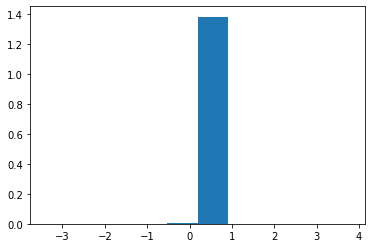

In [12]:
plt.hist(color.rgb2lab(farm[0])[:,:,1].ravel(), density = True)

The pixel values for the a layer for the MSE farmscape image

(array([0.0081325 , 0.03553737, 0.01177719, 0.00752837, 0.00563632,
        0.0195512 , 0.25713307, 0.01059549, 0.07357092, 0.0056164 ]),
 array([-13.3670187 , -11.06858463,  -8.77015057,  -6.4717165 ,
         -4.17328243,  -1.87484837,   0.4235857 ,   2.72201977,
          5.02045383,   7.3188879 ,   9.61732197]),
 <a list of 10 Patch objects>)

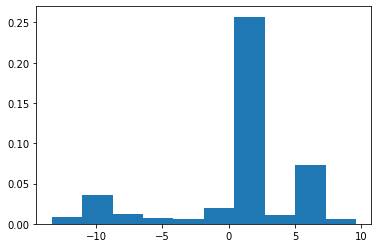

In [25]:
### Pixel values for the B layer for the MSE farmhouse image
plt.hist(color.rgb2lab(farm[0])[:,:,2].ravel(), density = True)

The pixel values for the b layer for the MSE farmscape image

**Training: Landscapes**

**Test: landscapes**

**Loss: custom loss function**

Epoch 1/10
50/50 [==============================] - 18s 367ms/step - loss: 0.0214 - accuracy: 0.5150
Epoch 2/10
50/50 [==============================] - 19s 373ms/step - loss: 0.0195 - accuracy: 0.5196
Epoch 3/10
50/50 [==============================] - 19s 375ms/step - loss: 0.0179 - accuracy: 0.5153
Epoch 4/10
50/50 [==============================] - 19s 374ms/step - loss: 0.0181 - accuracy: 0.5178
Epoch 5/10
50/50 [==============================] - 19s 378ms/step - loss: 0.0168 - accuracy: 0.5314
Epoch 6/10
50/50 [==============================] - 18s 367ms/step - loss: 0.0169 - accuracy: 0.5497
Epoch 7/10
50/50 [==============================] - 19s 371ms/step - loss: 0.0175 - accuracy: 0.5481
Epoch 8/10
50/50 [==============================] - 19s 376ms/step - loss: 0.0162 - accuracy: 0.5611
Epoch 9/10
50/50 [==============================] - 19s 372ms/step - loss: 0.0171 - accuracy: 0.5798
Epoch 10/10
50/50 [==============================] - 18s 368ms/step - loss: 0.0174 - accura

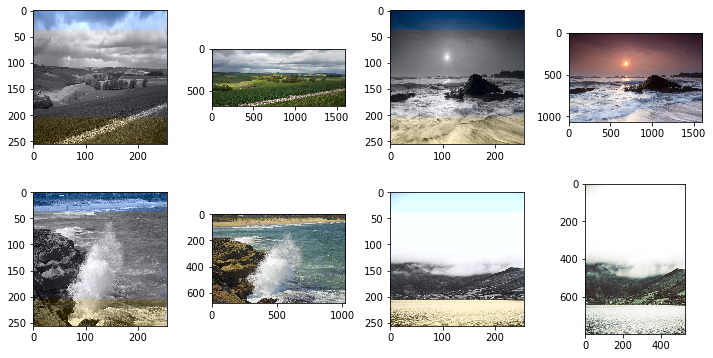

In [11]:
## Training: Landscapes
##Test: landscapes
##Loss: custom loss function
directory = 'landscapes/'
landscape_custom = MyModel()
landscape_custom.make_model(custom_loss_function, directory, steps_per_epoch = 50, epochs = 10)
# Training set: landscapes
#Error: MSE
#Test set: landscapes
files = list_files('landscapes/')[31:51]
i = 8
fig =plt.figure(figsize = (10, 10))
axes = []
farm_custom = landscape_custom.predict_process(files[0])
for a in range(0,i,2):
    axes.append(fig.add_subplot(4, 4, a+1))
    img = landscape_custom.predict_process(files[a])
    plt.imshow(img[0], cmap = 'viridis')
    axes.append(fig.add_subplot(4, 4, a+2))
    plt.imshow(io.imread(files[a]))
fig.tight_layout()    
plt.show()

The custom loss function incentivizes the model not use brown. Here blues and yellows are starting to come out.

(array([1.02755267e-03, 1.53163511e-03, 1.95816641e-03, 2.52041221e-03,
        4.67245648e-03, 1.40551756e-01, 4.20210879e-01, 6.23608144e-02,
        3.97449618e-04, 6.78572518e-05]),
 array([-9.71790067, -8.14383864, -6.56977661, -4.99571458, -3.42165255,
        -1.84759052, -0.27352849,  1.30053354,  2.87459557,  4.4486576 ,
         6.02271962]),
 <a list of 10 Patch objects>)

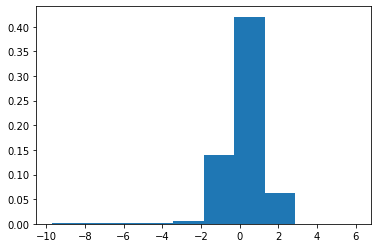

In [14]:
plt.hist(color.rgb2lab(farm_custom[0])[:,:,1].ravel(), density = True)

a layer values for the farm with the custom loss function.  Very narrow compared to the original.

(array([0.01160083, 0.00746751, 0.00281752, 0.0009271 , 0.00838495,
        0.09374102, 0.00133271, 0.00535497, 0.0199206 , 0.00667802]),
 array([-35.28408813, -28.96398411, -22.64388008, -16.32377605,
        -10.00367203,  -3.683568  ,   2.63653603,   8.95664005,
         15.27674408,  21.59684811,  27.91695213]),
 <a list of 10 Patch objects>)

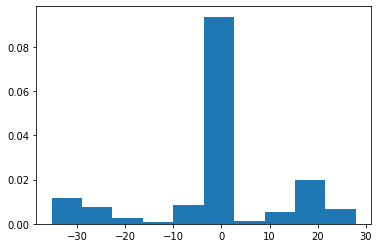

In [16]:
plt.hist(color.rgb2lab(farm_custom[0])[:,:,2].ravel(), density = True)

b layer values for the farm with the custom loss function.  Much wider, but very modal around 0, meaning that is still quite a bit of gray/brown in the photo

Epoch 1/10
50/50 [==============================] - 19s 384ms/step - loss: 0.0249 - accuracy: 0.4727
Epoch 2/10
50/50 [==============================] - 19s 376ms/step - loss: 0.0215 - accuracy: 0.4941
Epoch 3/10
50/50 [==============================] - 19s 374ms/step - loss: 0.0201 - accuracy: 0.5012
Epoch 4/10
50/50 [==============================] - 19s 376ms/step - loss: 0.0196 - accuracy: 0.4949
Epoch 5/10
50/50 [==============================] - 19s 377ms/step - loss: 0.0192 - accuracy: 0.4968
Epoch 6/10
50/50 [==============================] - 19s 374ms/step - loss: 0.0192 - accuracy: 0.4903
Epoch 7/10
50/50 [==============================] - 19s 377ms/step - loss: 0.0161 - accuracy: 0.4796
Epoch 8/10
50/50 [==============================] - 19s 378ms/step - loss: 0.0182 - accuracy: 0.4814
Epoch 9/10
50/50 [==============================] - 19s 371ms/step - loss: 0.0169 - accuracy: 0.4693
Epoch 10/10
50/50 [==============================] - 19s 371ms/step - loss: 0.0174 - accura

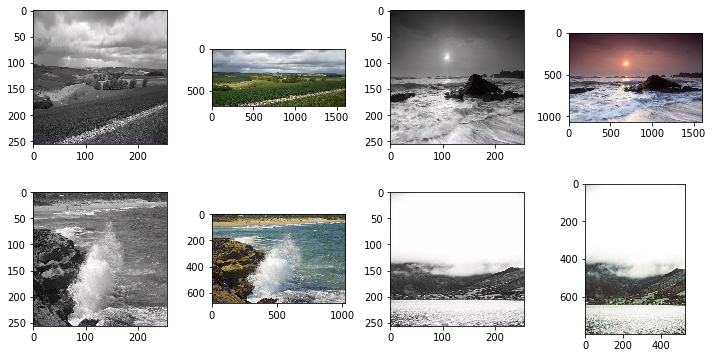

In [5]:
def custom_loss_function_L1(y_actual, y_predicted):
    '''
    Takes actual and predicted values and returns a loss function value
    
    Input: y_actual, y_predicted (np arrays)
    Output: loss function value (float)
    
   '''

    cv = kb.abs(kb.mean((y_actual - y_predicted)) - kb.mean(kb.square(y_predicted))/5)
    return cv

## Training: Landscapes
##Test: landscapes
##Loss: custom loss function separate
directory = 'landscapes/'
landscape_L1 = MyModel()
landscape_L1.make_model(custom_loss_function_L1, directory, steps_per_epoch = 50, epochs = 10)
# Training set: landscapes
#Error: MSE
#Test set: landscapes
files = list_files('landscapes/')[31:51]
i = 8
fig =plt.figure(figsize = (10, 10))
axes = []
for a in range(0,i,2):
    axes.append(fig.add_subplot(4, 4, a+1))
    img = landscape_L1.predict_process(files[a])
    plt.imshow(img[0], cmap = 'viridis')
    axes.append(fig.add_subplot(4, 4, a+2))
    plt.imshow(io.imread(files[a]))
fig.tight_layout()    
plt.show()

This model used an adapted L1 loss function, with mediocre results

Epoch 1/10
50/50 [==============================] - 18s 367ms/step - loss: 0.0083 - accuracy: 0.5028
Epoch 2/10
50/50 [==============================] - 19s 374ms/step - loss: 0.0091 - accuracy: 0.4970
Epoch 3/10
50/50 [==============================] - 18s 368ms/step - loss: 0.0066 - accuracy: 0.5414
Epoch 4/10
50/50 [==============================] - 19s 376ms/step - loss: 0.0059 - accuracy: 0.5393
Epoch 5/10
50/50 [==============================] - 18s 364ms/step - loss: 0.0053 - accuracy: 0.5398
Epoch 6/10
50/50 [==============================] - 19s 375ms/step - loss: 0.0044 - accuracy: 0.5459
Epoch 7/10
50/50 [==============================] - 19s 374ms/step - loss: 0.0029 - accuracy: 0.5520
Epoch 8/10
50/50 [==============================] - 19s 380ms/step - loss: 0.0037 - accuracy: 0.5561
Epoch 9/10
50/50 [==============================] - 18s 370ms/step - loss: 0.0035 - accuracy: 0.5750
Epoch 10/10
50/50 [==============================] - 19s 371ms/step - loss: 0.0027 - accura

/home/ubuntu/anaconda3/envs/tensorflow2_latest_p37/lib/python3.7/site-packages/skimage/color/colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 2163 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
/home/ubuntu/anaconda3/envs/tensorflow2_latest_p37/lib/python3.7/site-packages/skimage/color/colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 17213 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
/home/ubuntu/anaconda3/envs/tensorflow2_latest_p37/lib/python3.7/site-packages/skimage/color/colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 6713 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
/home/ubuntu/anaconda3/envs/tensorflow2_latest_p37/lib/python3.7/site-packages/skimage/color/colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 14003 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


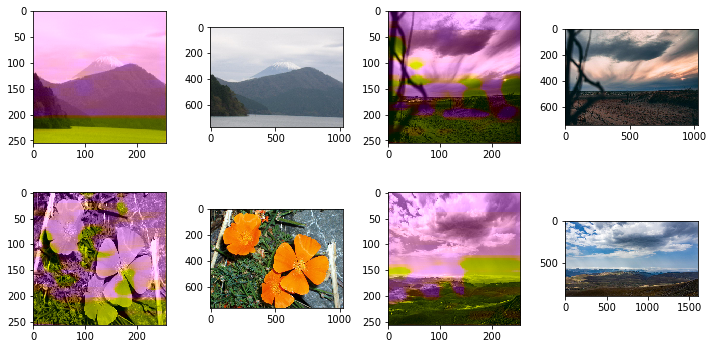

In [4]:
directory = 'landscapes/'
landscape_extreme = MyModel()
landscape_extreme.make_model(custom_loss_extreme, directory, steps_per_epoch = 50, epochs = 10)
# Training set: landscapes
#Error: custom_loss_extreme
#Test set: landscapes
files = list_files('landscapes/')[30:50]
i = 8
fig =plt.figure(figsize = (10, 10))
axes = []
for a in range(0,i,2):
    axes.append(fig.add_subplot(4, 4, a+1))
    img = landscape_extreme.predict_process(files[a])
    plt.imshow(img[0], cmap = 'viridis')
    axes.append(fig.add_subplot(4, 4, a+2))
    plt.imshow(io.imread(files[a]))
fig.tight_layout()    
plt.show()

This model used extreme values for the hyperparameters of the loss function.  Interestingly, this one seems to incentivize the use of red and green but not very much blue and yellow

**Training set: landscapes**

**Error: custom_loss_tens**

**Test set: landscapes**

Epoch 1/10
50/50 [==============================] - 18s 370ms/step - loss: 0.1126 - accuracy: 0.5001
Epoch 2/10
50/50 [==============================] - 18s 370ms/step - loss: 0.0895 - accuracy: 0.5078
Epoch 3/10
50/50 [==============================] - 19s 376ms/step - loss: 0.0850 - accuracy: 0.5154
Epoch 4/10
50/50 [==============================] - 19s 377ms/step - loss: 0.0835 - accuracy: 0.5690
Epoch 5/10
50/50 [==============================] - 19s 378ms/step - loss: 0.0894 - accuracy: 0.6259
Epoch 6/10
50/50 [==============================] - 19s 374ms/step - loss: 0.0778 - accuracy: 0.6315
Epoch 7/10
50/50 [==============================] - 19s 376ms/step - loss: 0.0783 - accuracy: 0.6504
Epoch 8/10
50/50 [==============================] - 18s 367ms/step - loss: 0.0758 - accuracy: 0.6645
Epoch 9/10
50/50 [==============================] - 19s 372ms/step - loss: 0.0768 - accuracy: 0.6683
Epoch 10/10
50/50 [==============================] - 19s 373ms/step - loss: 0.0796 - accura

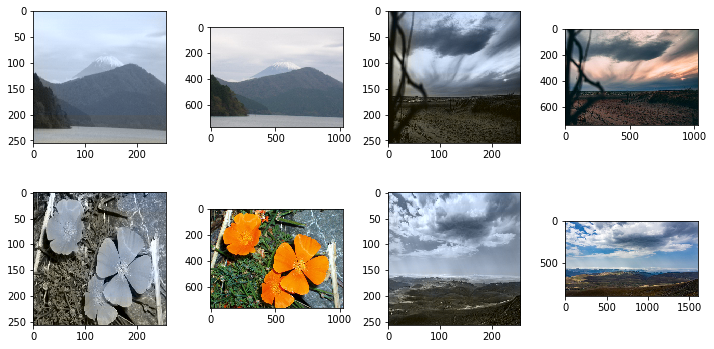

In [3]:
directory = 'landscapes/'
landscape_tens = MyModel()
landscape_tens.make_model(custom_loss_tens, directory, steps_per_epoch = 50, epochs = 10)
files = list_files('landscapes/')[30:50]
i = 8
fig =plt.figure(figsize = (10, 10))
axes = []
for a in range(0,i,2):
    axes.append(fig.add_subplot(4, 4, a+1))
    img = landscape_tens.predict_process(files[a])
    plt.imshow(img[0], cmap = 'viridis')
    axes.append(fig.add_subplot(4, 4, a+2))
    plt.imshow(io.imread(files[a]))
fig.tight_layout()    
plt.show()

Another try at a loss function

**Training set: landscapes**
    
**Error: custom_loss_parabola**
    
**Test set: landscapes**

Epoch 1/10
50/50 [==============================] - 19s 388ms/step - loss: 0.2768 - accuracy: 0.5019
Epoch 2/10
50/50 [==============================] - 20s 396ms/step - loss: 0.0114 - accuracy: 0.5003
Epoch 3/10
50/50 [==============================] - 19s 389ms/step - loss: -0.0103 - accuracy: 0.5005
Epoch 4/10
50/50 [==============================] - 19s 385ms/step - loss: -0.0153 - accuracy: 0.5013
Epoch 5/10
50/50 [==============================] - 19s 379ms/step - loss: -0.0145 - accuracy: 0.5006
Epoch 6/10
50/50 [==============================] - 19s 373ms/step - loss: -0.0282 - accuracy: 0.5012
Epoch 7/10
50/50 [==============================] - 19s 382ms/step - loss: -0.0102 - accuracy: 0.4837
Epoch 8/10
50/50 [==============================] - 19s 381ms/step - loss: -0.0129 - accuracy: 0.4760
Epoch 9/10
50/50 [==============================] - 19s 383ms/step - loss: -0.0055 - accuracy: 0.4799
Epoch 10/10
50/50 [==============================] - 19s 376ms/step - loss: -0.0155 

/home/ubuntu/anaconda3/envs/tensorflow2_latest_p37/lib/python3.7/site-packages/skimage/color/colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 26633 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
/home/ubuntu/anaconda3/envs/tensorflow2_latest_p37/lib/python3.7/site-packages/skimage/color/colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 45388 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
/home/ubuntu/anaconda3/envs/tensorflow2_latest_p37/lib/python3.7/site-packages/skimage/color/colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 38092 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
/home/ubuntu/anaconda3/envs/tensorflow2_latest_p37/lib/python3.7/site-packages/skimage/color/colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 31358 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


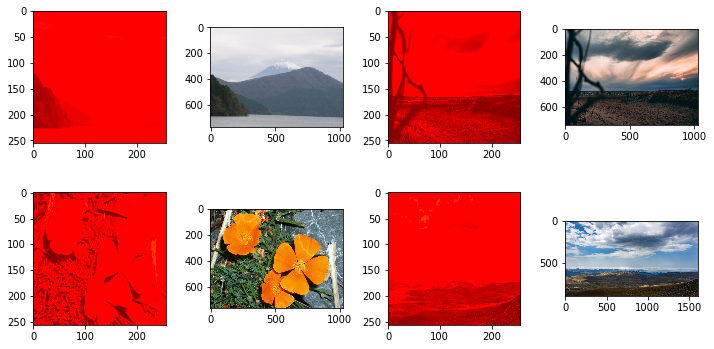

In [4]:
directory = 'landscapes/'
landscape_parabola = MyModel()
landscape_parabola.make_model(custom_loss_parabola, directory, steps_per_epoch = 50, epochs = 10)
# Training set: landscapes
#Error: custom_loss_parabola
#Test set: landscapes
files = list_files('landscapes/')[30:50]
i = 8
fig =plt.figure(figsize = (10, 10))
axes = []
for a in range(0,i,2):
    axes.append(fig.add_subplot(4, 4, a+1))
    img = landscape_parabola.predict_process(files[a])
    plt.imshow(img[0], cmap = 'viridis')
    axes.append(fig.add_subplot(4, 4, a+2))
    plt.imshow(io.imread(files[a]))
fig.tight_layout()    
plt.show()

this one was red!

The below code can be used to show the color.  It is heavily adapted from [this](https://stackoverflow.com/questions/38246559/how-to-create-a-heat-map-in-python-that-ranges-from-green-to-red/38247002#38247002).  I added a function for plotting as well as made a dictionary that would show blue-yellow colors

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

# This dictionary defines the colormap
cdict = {'red':  ((0.0, 0.0, 0.0),   # no red at 0
                  (0.5, 1.0, 1.0),   # all channels set to 1.0 at 0.5 to create white
                  (1.0, 0.8, 0.8)),  # set to 0.8 so its not too bright at 1

        'green': ((0.0, 0.8, 0.8),   # set to 0.8 so its not too bright at 0
                  (0.5, 1.0, 1.0),   # all channels set to 1.0 at 0.5 to create white
                  (1.0, 0.0, 0.0)),  # no green at 1

        'blue':  ((0.0, 0.0, 0.0),   # no blue at 0
                  (0.5, 1.0, 1.0),   # all channels set to 1.0 at 0.5 to create white
                  (1.0, 0.0, 0.0))   # no blue at 1
       }

cdict_2 = {'red':  ((0.0, 0.8, 0.8),   # no red at 0
                  (0.5, 1.0, 1.0),   # all channels set to 1.0 at 0.5 to create white
                  (1.0, 0.0, 0.0)),  # set to 0.8 so its not too bright at 1

        'green': ((0.0, 0.8, 0.8),   # set to 0.8 so its not too bright at 0
                  (0.5, 1.0, 1.0),   # all channels set to 1.0 at 0.5 to create white
                  (1.0, 0.0, 0.0)),  # no green at 1

        'blue':  ((0.0, 0.0, 0.0),   # no blue at 0
                  (0.5, 1.0, 1.0),   # all channels set to 1.0 at 0.5 to create white
                  (1.0, 0.8, 0.8))   # no blue at 1
       }

# Create the colormap using the dictionary
blue_yellow = colors.LinearSegmentedColormap('GnRd', cdict_2)
red_green = colors.LinearSegmentedColormap('GnRd', cdict)

img = lab[:, :, 1]

def plot_lab_layer(img, cmap):
    '''
    Input: 1 layer image, colormap (blue_yellow or red_green)
    Output: none
    
    Plots the image using the designated colormap.  Used to illustrate a & b layers of a Lab colorspace image
    '''
    fig,ax = plt.subplots(1)
    p=ax.pcolormesh(img,cmap=cmap,vmin=-3,vmax=3)
    fig.colorbar(p,ax=ax)
    plt.show()
    
plot_lab_layer(img, red_green)